# This is just testing, how classifiers would classify these objects, if they knew locations. I am almost certain, that this gives horrible results, but without testing it is impossible to know the results.

In [49]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import time
import pickle

In [2]:
positive=pd.read_csv("test_labels.csv")
positive2=pd.read_csv("train_labels.csv")
positive=pd.concat([positive,positive2])
positive=positive.sort_values(by="filename").reset_index(drop=True).drop(["width","height","class"],axis=1)
for i in range(900):
    positive[i]=np.nan
positive

,filename,xmin,ymin,xmax,ymax,0,1,2,3,4,...,890,891,892,893,894,895,896,897,898,899
0,1(1).jpg,148,64,344,261,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1(10).jpg,58,88,289,265,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1(100).jpg,70,212,313,368,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1(101).jpg,103,193,318,368,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1(102).jpg,82,206,290,365,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,1(95).jpg,122,177,322,361,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,1(96).jpg,114,194,298,368,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,1(97).jpg,115,232,281,368,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,1(98).jpg,105,235,307,368,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
files=os.listdir("positive")
positiveImages=[]
for i in range(1,len(files)+1):
    img=cv2.imread("positive//1({}).jpg".format(i))
    original=img.shape
    grayscale=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret,threshold = cv2.threshold(grayscale,100,255,cv2.THRESH_BINARY)
    resize=cv2.resize(threshold,(30,30))
    reshaped=resize.reshape(-1)
    positiveImages.append(reshaped)
    location=int(positive[positive["filename"]=="1({}).jpg".format(i)].index.values)
    for x,j in enumerate(reshaped):
        positive.at[location,x]=j

In [4]:
positive=positive.drop("filename",axis=1)
positive

,xmin,ymin,xmax,ymax,0,1,2,3,4,5,...,890,891,892,893,894,895,896,897,898,899
0,148,64,344,261,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
1,58,88,289,265,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
2,70,212,313,368,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0,0.0,0.0
3,103,193,318,368,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
4,82,206,290,365,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,122,177,322,361,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
136,114,194,298,368,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
137,115,232,281,368,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
138,105,235,307,368,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0


In [5]:
files=os.listdir("negative")
negativeImages=[]
for i in range(1,len(files)+1):
    img=cv2.imread("negative//1({}).jpg".format(i))
    original=img.shape
    grayscale=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret,threshold = cv2.threshold(grayscale,100,255,cv2.THRESH_BINARY)
    resize=cv2.resize(threshold,(30,30))
    reshaped=resize.reshape(-1)
    negativeImages.append(reshaped)

In [6]:
negative=pd.DataFrame(negativeImages)
negative["xmin"]=-1
negative["ymin"]=-1
negative["xmax"]=-1
negative["ymax"]=-1
negative

,0,1,2,3,4,5,6,7,8,9,...,894,895,896,897,898,899,xmin,ymin,xmax,ymax
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,94,255,255,-1,-1,-1,-1
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,239,255,255,-1,-1,-1,-1
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,228,255,255,-1,-1,-1,-1
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,-1,-1,-1,-1
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,-1,-1,-1,-1
121,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,-1,-1,-1,-1
122,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,-1,-1,-1,-1
123,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,-1,-1,-1,-1


In [7]:
whole=pd.concat([positive,negative])
whole

,xmin,ymin,xmax,ymax,0,1,2,3,4,5,...,890,891,892,893,894,895,896,897,898,899
0,148,64,344,261,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
1,58,88,289,265,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
2,70,212,313,368,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0,0.0,0.0
3,103,193,318,368,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
4,82,206,290,365,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,-1,-1,-1,-1,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,120.0,255.0,255.0,255.0,255.0,255.0,255.0
121,-1,-1,-1,-1,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
122,-1,-1,-1,-1,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
123,-1,-1,-1,-1,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0


In [8]:
result=whole[["xmin","xmax","ymin","ymax"]]
result
data=whole.drop(["xmin","xmax", "ymin","ymax"],axis=1)
#X_train, X_test, y_train, y_test = train_test_split(data,result,test_size=0.3,random_state=0)

In [29]:
KNN = KNeighborsClassifier(n_neighbors=1).fit(X_train,y_train)
rf = RandomForestClassifier().fit(X_train,y_train)

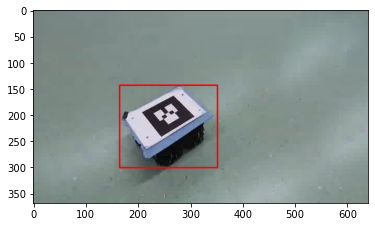

In [48]:
img=cv2.imread("positive//1(67).jpg")
original=img.shape
grayscale=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,threshold = cv2.threshold(grayscale,100,255,cv2.THRESH_BINARY)
resize=cv2.resize(threshold,(30,30))
reshaped=resize.reshape(-1)
prediction=rf.predict(pd.DataFrame([reshaped]))
if -1 not in prediction[0]:
    img=cv2.rectangle(img,(prediction[0][0],prediction[0][2]),(prediction[0][1],prediction[0][3]),(255,0,0),2)
    plt.imshow(img)

In [51]:
pickle.dump(rf,open("modelrf.sav","wb"))
pickle.dump(KNN,open("modelKNN.sav","wb"))